## General Idea
Represent a random variable **k** in term of Gaussian. Compute the $k_i$ and reassampling in the end.

$k = \sum_{i=0}^{\infty} k_i H_i (\xi) $

In [1]:
import numpy as np
import numpy.polynomial.hermite_e as H
import matplotlib.pyplot as plt
from scipy.stats import norm
# from IPython.display import display

In [86]:
def Herm(n):
    coeffs = [0] * (n+1)
    coeffs[n] = 1
    return coeffs

def inner_product(h1, h2):
    return lambda x: H.hermeval(x, H.hermemul(h1, h2))

def trapezoid_int(f, a, b, n):
    P = [a + i*(b-a)/n for i in range(0, n+1)]
    F = [1/2 * np.abs(P[i+1] - P[i]) * (f(P[i+1]) + f(P[i])) for i in range(0, n)]
    return sum(F)


# inverse distribution functions. parametarized
def unif_icdf(params):
    a = params[0]
    b = params[1]
    return lambda u : u * (b - a) + a

def expo_icdf(params):
    return lambda u : -np.log(1-u)

def norm_icdf(params):
    return lambda u : norm.ppf(u, loc=0, scale=1)

def approximate_rv_coeffs(P, h):
    """
    :params:
        P: truncation order
        h: target distribution inverse cdf h
    """
    
    # initialize lists for output to make syntax more canonical with
    ki = [0] * P
    
    # set up Gauss-Hermite quadrature
    m = P**2
    x, w = H.hermegauss(m)
    
    # print('x:', x)
    # print('w:', x)
    
    # compute the coefficients, and also build out k in the same 
    for i in range(0, P):
        # compute the innter product with Gauss-Hermite quadrature
        ip = sum([inner_product(Herm(i), Herm(i))(x[idx]) * w[idx] for idx in range(m)])
        # compute integral
        integrand = lambda u : h(u) * H.hermeval(norm.ppf(u, loc=0, scale=1), Herm(i))
        
        ki[i] = np.sqrt(2*np.pi) / ip * trapezoid_int(integrand, 0.001, 1-0.001 , 1000)
    return ki

def generate_rv(ki, S):
    """build a random variable from the coefficients ki"""
    k = [0] * len(S)
    for i in range(len(ki)):
        k = np.add(k, ki[i] * H.hermeval(S, Herm(i)))
    return k

In [87]:
N = 5000
S = np.random.normal(loc=0, scale=1, size=N)

In [88]:
h_unif = unif_icdf([0, 3])
ki_uniform = approximate_rv_coeffs(13, h_unif)
k_unif = generate_rv(ki_uniform, S)

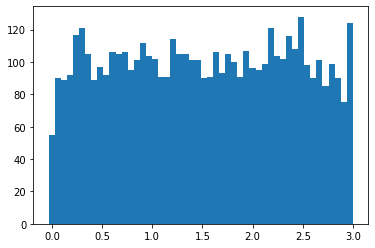

In [89]:
plt.hist(k_unif, bins=50)
plt.show()

In [92]:
h_unif

<function __main__.unif_icdf.<locals>.<lambda>(u)>